The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car

Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# read file
CarPrices = pd.read_csv('CarPrice_Assignment.csv', encoding='ISO-8859-1')

In [3]:
CarPrices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
CarPrices.shape

(205, 26)

In [5]:
CarPrices.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
CarPrices.isnull().values.any()

False

In [7]:
CarPrices.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [22]:
# car_ID is ID
CarPrices.drop(labels='car_ID', axis=1, inplace=True, errors='raise')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002241B9D6B88>,
      dtype=object)

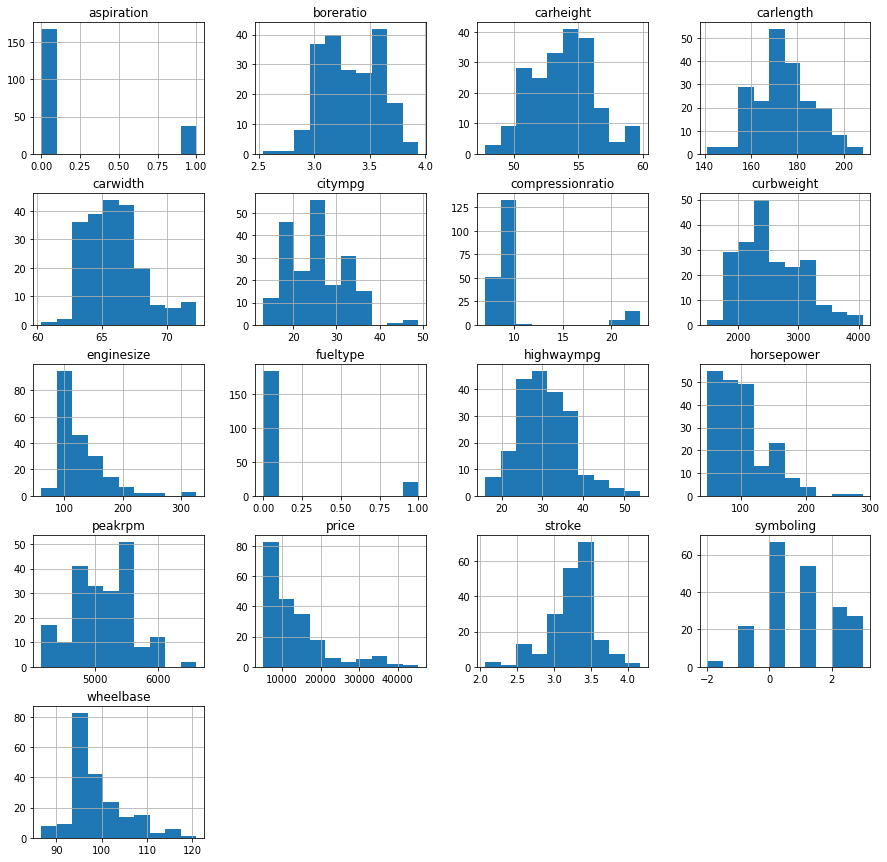

In [52]:
CarPrices.select_dtypes(include=['float64', 'int64']).hist(bins=10, figsize=(15, 15))

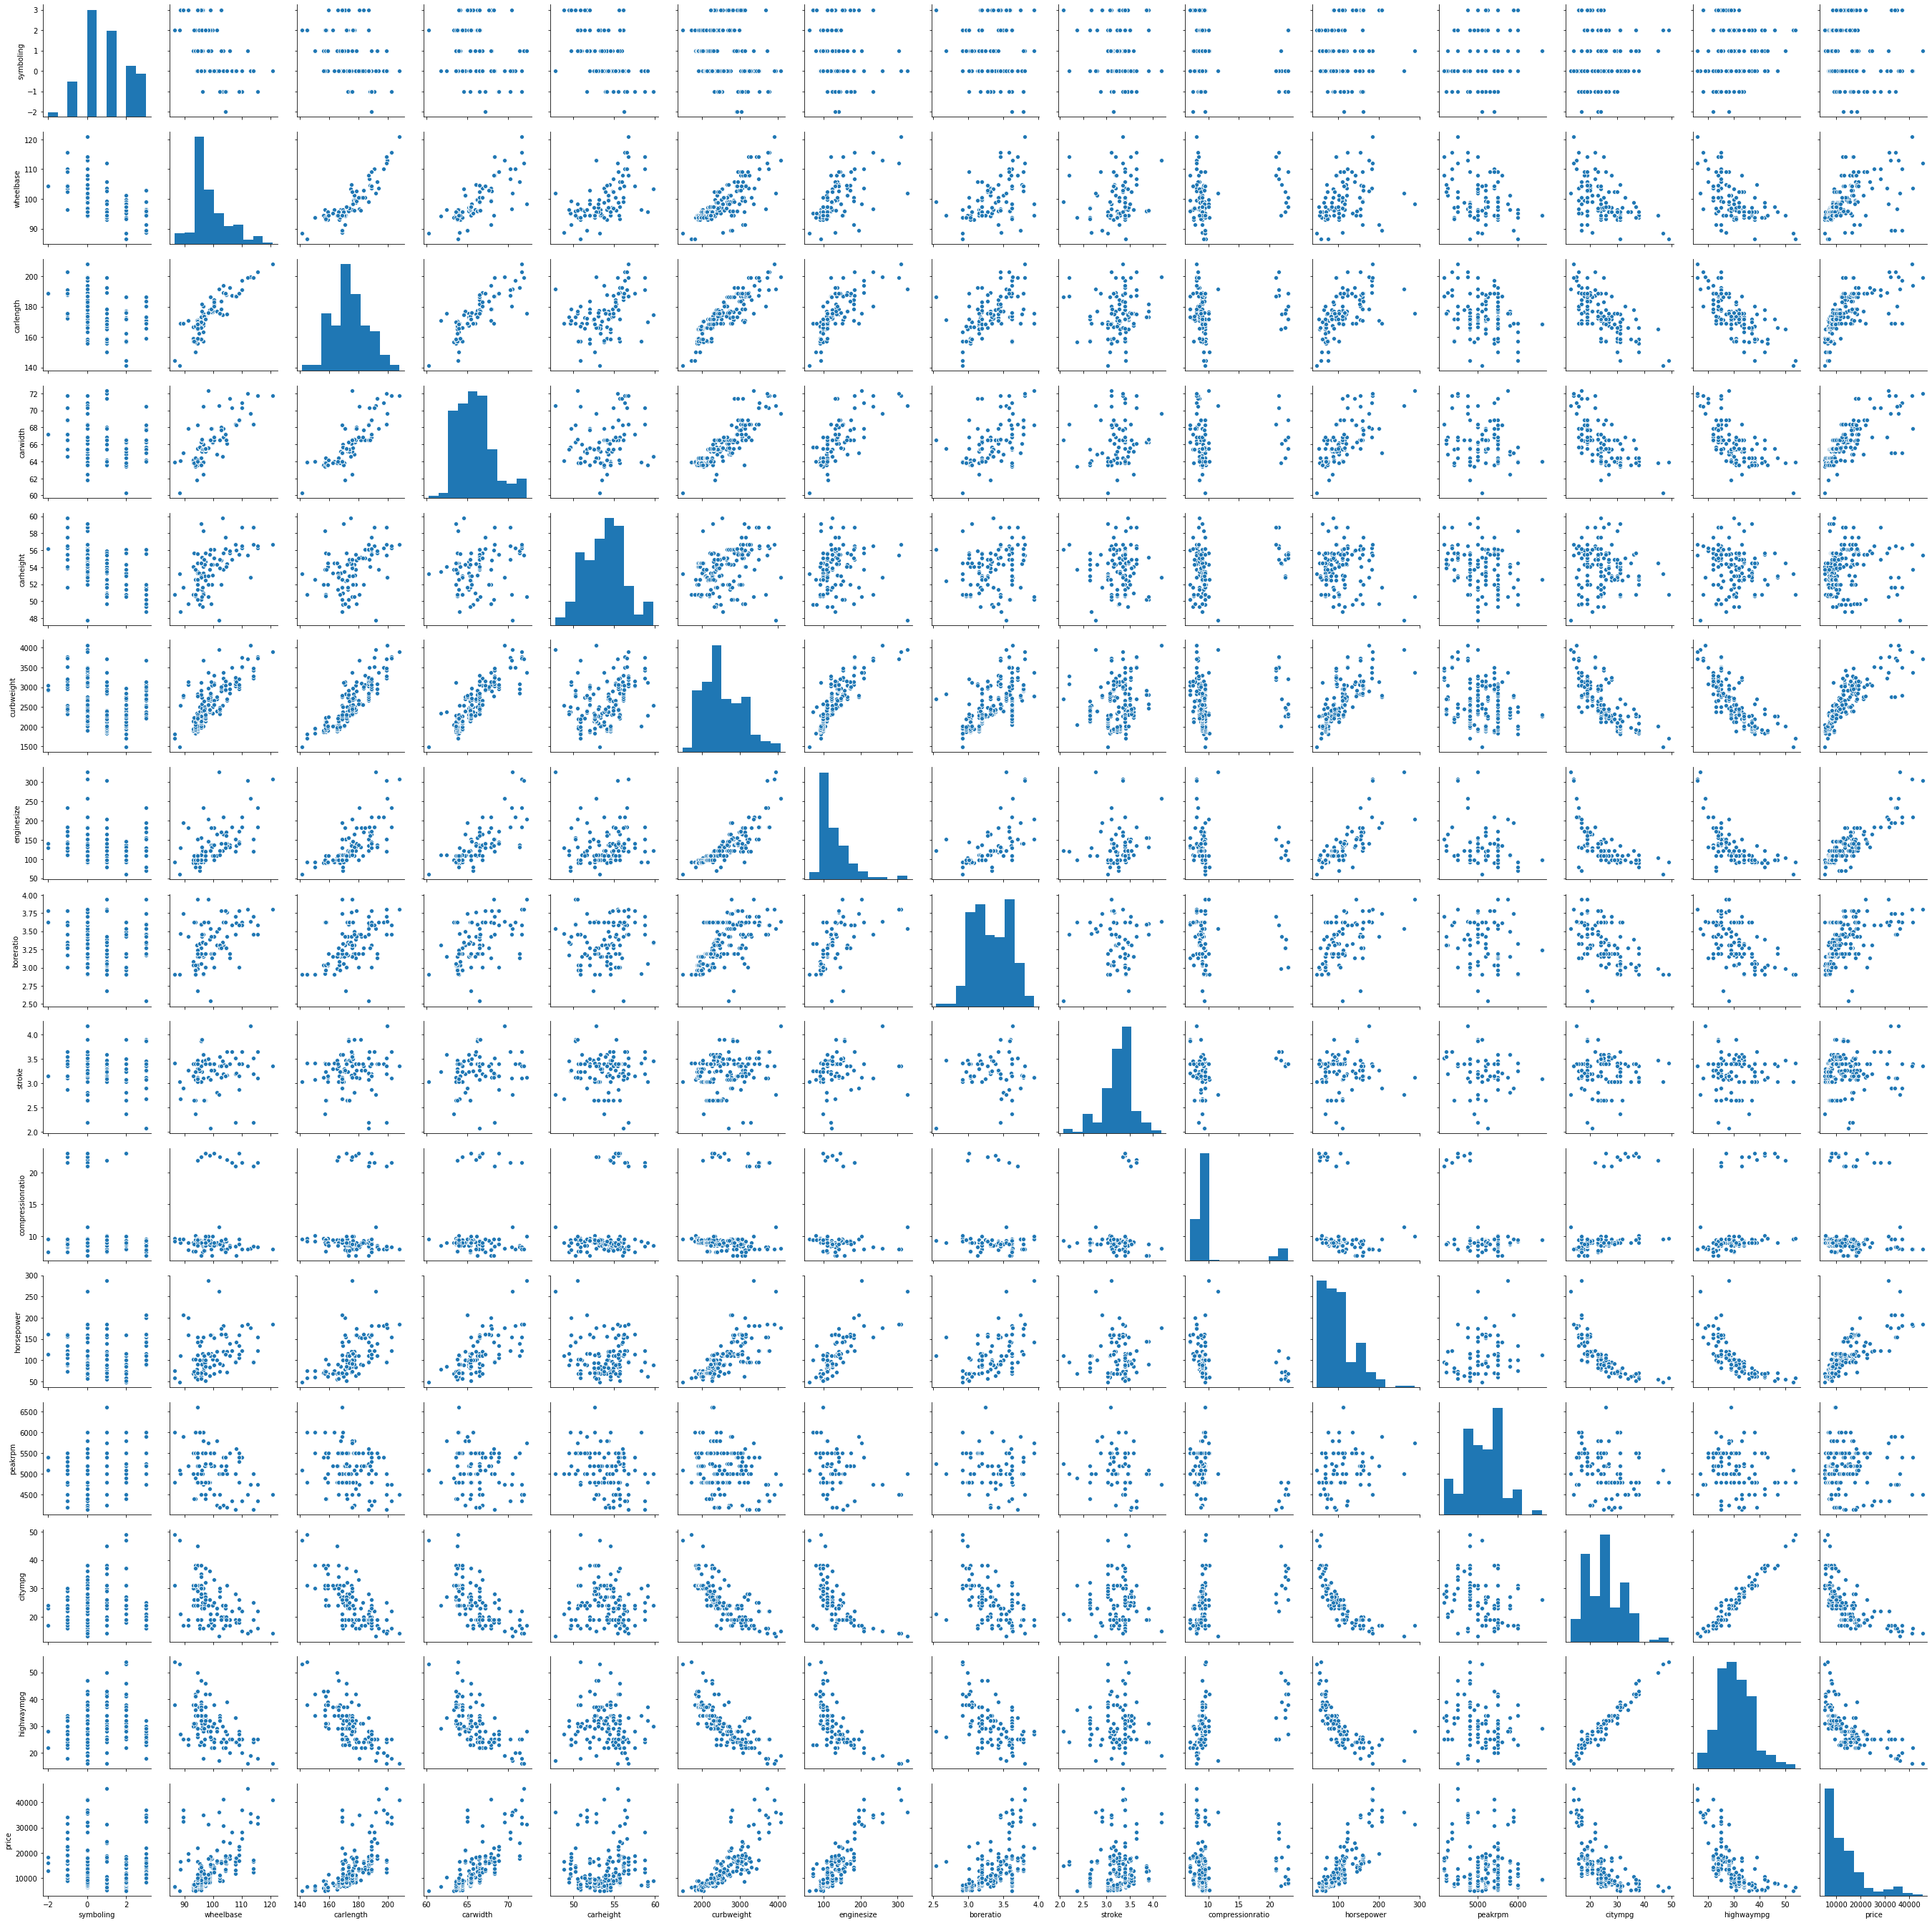

In [9]:
#pair-plots
sns.pairplot(CarPrices.select_dtypes(include=['float64', 'int64']))
plt.show()

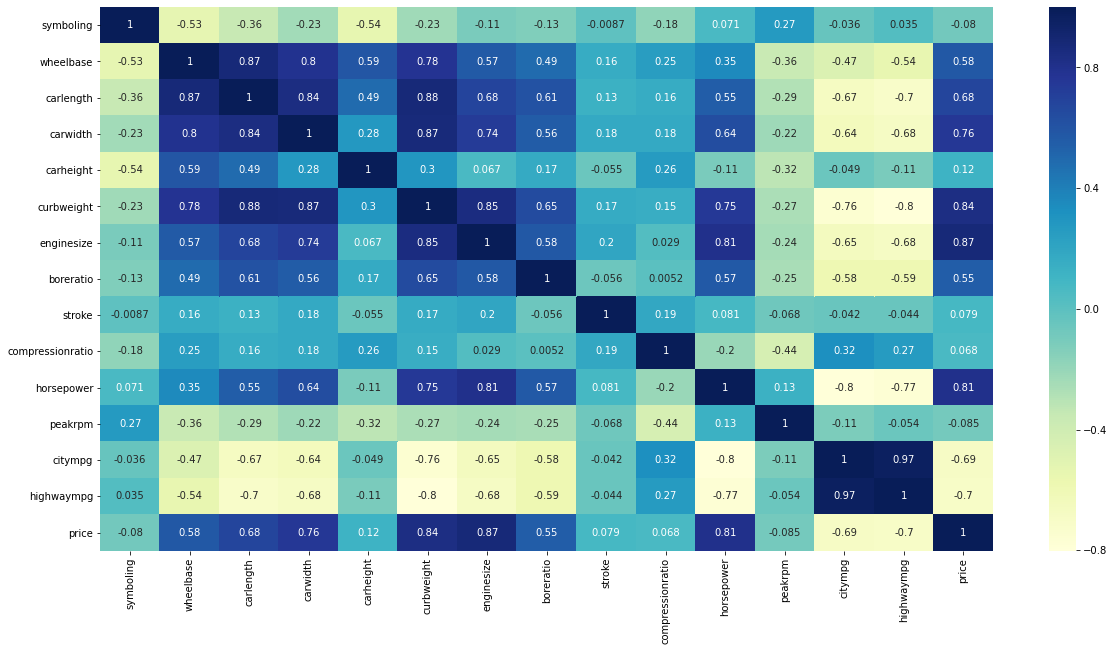

In [11]:
#heatmap of linear correlations
sns.heatmap(CarPrices.select_dtypes(include=['float64', 'int64']).corr(), cmap="YlGnBu", annot=True)
plt.gcf().set_size_inches(20, 10)

In [12]:
CarPrices.dtypes[CarPrices.dtypes == np.object]

CarName           object
fueltype          object
aspiration        object
doornumber        object
carbody           object
drivewheel        object
enginelocation    object
enginetype        object
cylindernumber    object
fuelsystem        object
dtype: object

In [13]:
CarPrices['CarName'].astype('category').value_counts()

toyota corona        6
toyota corolla       6
peugeot 504          6
subaru dl            4
honda civic          3
                    ..
plymouth valiant     1
porcshce panamera    1
porsche boxter       1
porsche macan        1
Nissan versa         1
Name: CarName, Length: 147, dtype: int64

In [23]:
# create company column from CarName and drop CarName
CarPrices['company'] = CarPrices['CarName'].str.split(pat=' ', n=-1, expand=True)[0]
CarPrices.drop(labels='CarName', axis=1, inplace=True, errors='raise')

In [15]:
CarPrices['company'].astype('category').value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: company, dtype: int64

In [24]:
CarPrices['company'].replace(to_replace={'alfa-romero': 'alfa-romeo', 'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}, value=None, inplace=True, limit=None, regex=False, method=None)

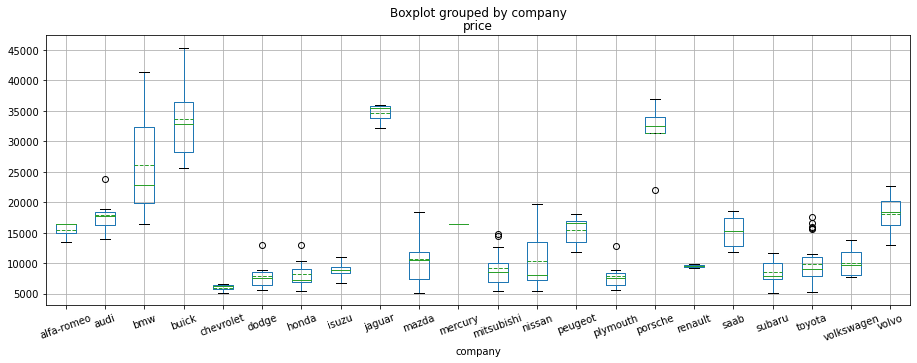

In [36]:
CarPrices.boxplot(column='price', by='company', ax=None, fontsize=None, rot=20, grid=True, figsize=(15,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [37]:
# create dummies for company and drop company
company = pd.get_dummies(CarPrices['company'], prefix='company', prefix_sep='_')
CarPrices = pd.concat([CarPrices, company], axis = 1)
CarPrices.drop(labels='company', axis=1, inplace=True, errors='raise')

In [38]:
CarPrices['fueltype'].astype('category').value_counts().sort_index()

diesel     20
gas       185
Name: fueltype, dtype: int64

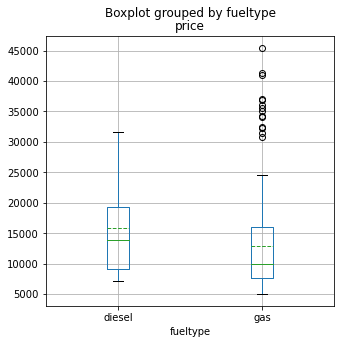

In [42]:
CarPrices.boxplot(column='price', by='fueltype', ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [43]:
# convert fueltype 'gas': 0, 'diesel': 1
CarPrices['fueltype'].replace(to_replace={'gas': 0, 'diesel': 1}, value=None, inplace=True, limit=None, regex=False, method=None)

In [44]:
CarPrices['aspiration'].astype('category').value_counts().sort_index()

std      168
turbo     37
Name: aspiration, dtype: int64

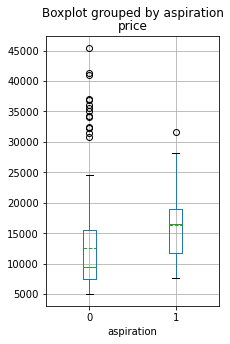

In [54]:
CarPrices.boxplot(column='price', by='aspiration', ax=None, fontsize=None, rot=0, grid=True, figsize=(3,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [46]:
# convert aspiration 'std': 0, 'turbo': 1
CarPrices['aspiration'].replace(to_replace={'std': 0, 'turbo': 1}, value=None, inplace=True, limit=None, regex=False, method=None)

In [53]:
CarPrices['doornumber'].astype('category').value_counts().sort_index()

four    115
two      90
Name: doornumber, dtype: int64

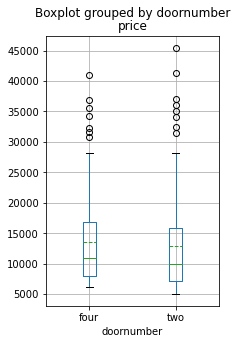

In [55]:
CarPrices.boxplot(column='price', by='doornumber', ax=None, fontsize=None, rot=0, grid=True, figsize=(3,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [56]:
# convert doornumber 'two': 2, 'four': 4
CarPrices['doornumber'].replace(to_replace={'two': 2, 'four': 4}, value=None, inplace=True, limit=None, regex=False, method=None)

In [57]:
CarPrices['carbody'].astype('category').value_counts().sort_index()

convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: carbody, dtype: int64

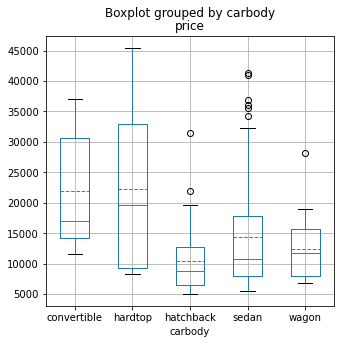

In [59]:
CarPrices.boxplot(column='price', by='carbody', ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [60]:
# create dummies for carbody and drop carbody
carbody = pd.get_dummies(CarPrices['carbody'], prefix='carbody', prefix_sep='_')
CarPrices = pd.concat([CarPrices, carbody], axis = 1)
CarPrices.drop(labels='carbody', axis=1, inplace=True, errors='raise')

In [61]:
CarPrices['drivewheel'].astype('category').value_counts().sort_index()

4wd      9
fwd    120
rwd     76
Name: drivewheel, dtype: int64

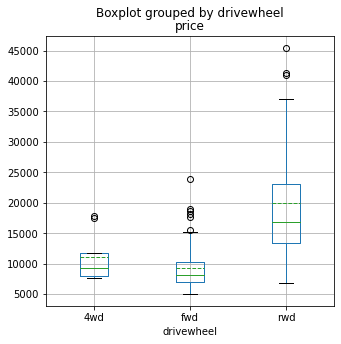

In [62]:
CarPrices.boxplot(column='price', by='drivewheel', ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [63]:
# create dummies for drivewheel and drop drivewheel
drivewheel = pd.get_dummies(CarPrices['drivewheel'], prefix='drivewheel', prefix_sep='_')
CarPrices = pd.concat([CarPrices, drivewheel], axis = 1)
CarPrices.drop(labels='drivewheel', axis=1, inplace=True, errors='raise')

In [65]:
CarPrices['enginelocation'].astype('category').value_counts().sort_index()

front    202
rear       3
Name: enginelocation, dtype: int64

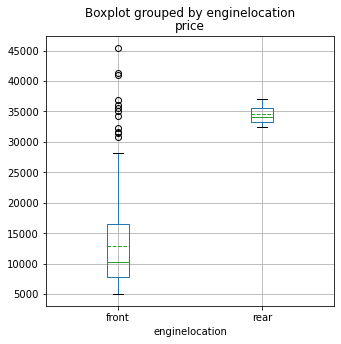

In [66]:
CarPrices.boxplot(column='price', by='enginelocation', ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [67]:
# convert enginelocation 'front': 0, 'rear': 1
CarPrices['enginelocation'].replace(to_replace={'front': 0, 'rear': 1}, value=None, inplace=True, limit=None, regex=False, method=None)

In [68]:
CarPrices['enginetype'].astype('category').value_counts().sort_index()

dohc      12
dohcv      1
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
Name: enginetype, dtype: int64

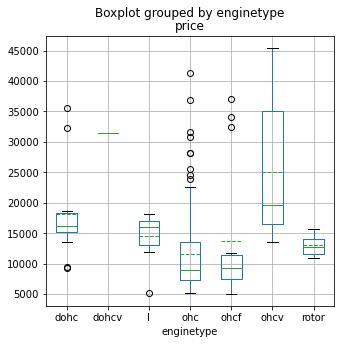

In [69]:
CarPrices.boxplot(column='price', by='enginetype', ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [70]:
# create dummies for enginetype and drop enginetype
enginetype = pd.get_dummies(CarPrices['enginetype'], prefix='enginetype', prefix_sep='_')
CarPrices = pd.concat([CarPrices, enginetype], axis = 1)
CarPrices.drop(labels='enginetype', axis=1, inplace=True, errors='raise')

In [71]:
CarPrices['cylindernumber'].astype('category').value_counts().sort_index()

eight       5
five       11
four      159
six        24
three       1
twelve      1
two         4
Name: cylindernumber, dtype: int64

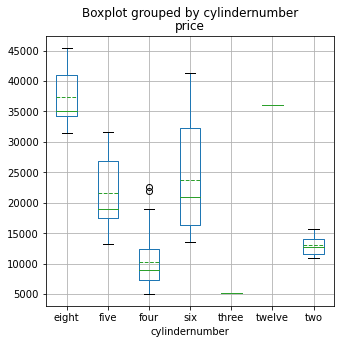

In [72]:
CarPrices.boxplot(column='price', by='cylindernumber', ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [73]:
# convert cylindernumber 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12
CarPrices['cylindernumber'].replace(to_replace={'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}, value=None, inplace=True, limit=None, regex=False, method=None)

In [74]:
CarPrices['fuelsystem'].astype('category').value_counts().sort_index()

1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
Name: fuelsystem, dtype: int64

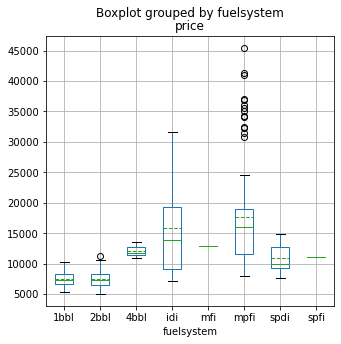

In [75]:
CarPrices.boxplot(column='price', by='fuelsystem', ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [76]:
# create dummies for fuelsystem and drop fuelsystem
fuelsystem = pd.get_dummies(CarPrices['fuelsystem'], prefix='fuelsystem', prefix_sep='_')
CarPrices = pd.concat([CarPrices, fuelsystem], axis = 1)
CarPrices.drop(labels='fuelsystem', axis=1, inplace=True, errors='raise')

In [77]:
# convert columns to dtype float64 for test-train split
CarPrices = CarPrices.astype('float64', copy=True, errors='raise')

In [78]:
CarPrices.dtypes

symboling          float64
fueltype           float64
aspiration         float64
doornumber         float64
enginelocation     float64
                    ...   
fuelsystem_idi     float64
fuelsystem_mfi     float64
fuelsystem_mpfi    float64
fuelsystem_spdi    float64
fuelsystem_spfi    float64
Length: 65, dtype: object

In [79]:
CarPrices.shape

(205, 65)

In [161]:
# test train split
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(CarPrices, train_size = 0.7, test_size = 0.3, random_state = 100)

In [118]:
# scale non-dummy variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

d:\programfiles_x64\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\programfiles_x64\python37\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
d:\programfiles_x64\python37\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [119]:
df_train[num_vars].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
# create X and y sets
y_train = df_train.pop('price')
X_train = df_train

In [121]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [122]:
# selected features
col = X_train.columns[rfe.support_]

In [123]:
col

Index(['enginelocation', 'wheelbase', 'carwidth', 'curbweight', 'enginesize',
       'horsepower', 'peakrpm', 'highwaympg', 'company_bmw', 'company_peugeot',
       'company_porsche', 'carbody_convertible', 'enginetype_l',
       'enginetype_rotor', 'fuelsystem_4bbl'],
      dtype='object')

In [124]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [125]:
# Adding a constant variable and fitting a model
import statsmodels.api as sm  
X_train_temp = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.00e-66
Time:                        04:52:05   Log-Likelihood:                 209.88
No. Observations:                 143   AIC:                            -387.8
Df Residuals:                     127   BIC:                            -340.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3505    

d:\programfiles_x64\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


*Several coefficients are negative and several have p-values grater than 0.05, so checking for multicollinearity*

In [126]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.28
4,curbweight,16.31
10,company_peugeot,10.33
6,horsepower,9.82
13,enginetype_l,9.79
5,enginesize,9.50
2,wheelbase,8.06
3,carwidth,7.05
8,highwaympg,4.80
14,enginetype_rotor,4.43


In [127]:
# dropping curbweight and refitting the model [1]
X_train_temp = X_train_rfe.drop(['curbweight'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     108.9
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           6.58e-64
Time:                        04:52:19   Log-Likelihood:                 199.83
No. Observations:                 143   AIC:                            -369.7
Df Residuals:                     128   BIC:                            -325.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2719    

In [128]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.11
9,company_peugeot,10.33
12,enginetype_l,9.73
5,horsepower,9.21
4,enginesize,7.94
3,carwidth,6.86
2,wheelbase,6.61
13,enginetype_rotor,4.40
7,highwaympg,4.18
14,fuelsystem_4bbl,4.01


In [129]:
# dropping company_peugeot and refitting the model [2]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     105.2
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           5.43e-62
Time:                        04:53:14   Log-Likelihood:                 192.21
No. Observations:                 143   AIC:                            -356.4
Df Residuals:                     129   BIC:                            -314.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2876    

In [130]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,75.49
5,horsepower,9.06
4,enginesize,7.91
3,carwidth,6.77
2,wheelbase,6.60
12,enginetype_rotor,4.40
13,fuelsystem_4bbl,4.01
7,highwaympg,3.97
9,company_porsche,2.30
6,peakrpm,1.78


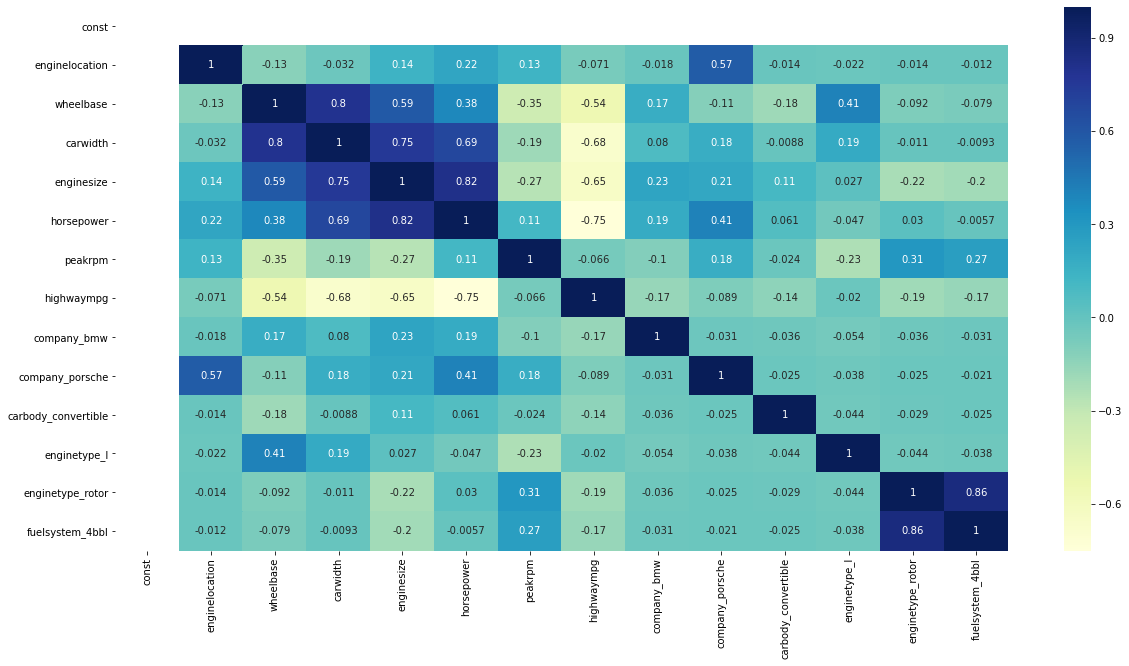

In [131]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train_temp.corr(), annot = True, cmap="YlGnBu")
plt.show()

*fueltype and compressionratio seem to be highly correlated, so dropping compressionratio as fueltype is binary and easier to interpret*

In [132]:
# dropping carwidth and refitting the model [3]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot', 'carwidth'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           8.44e-60
Time:                        04:56:54   Log-Likelihood:                 183.96
No. Observations:                 143   AIC:                            -341.9
Df Residuals:                     130   BIC:                            -303.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2532    

In [133]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.05
4,horsepower,8.60
3,enginesize,7.74
11,enginetype_rotor,4.38
12,fuelsystem_4bbl,4.00
6,highwaympg,3.97
2,wheelbase,3.57
8,company_porsche,2.06
5,peakrpm,1.78
1,enginelocation,1.60


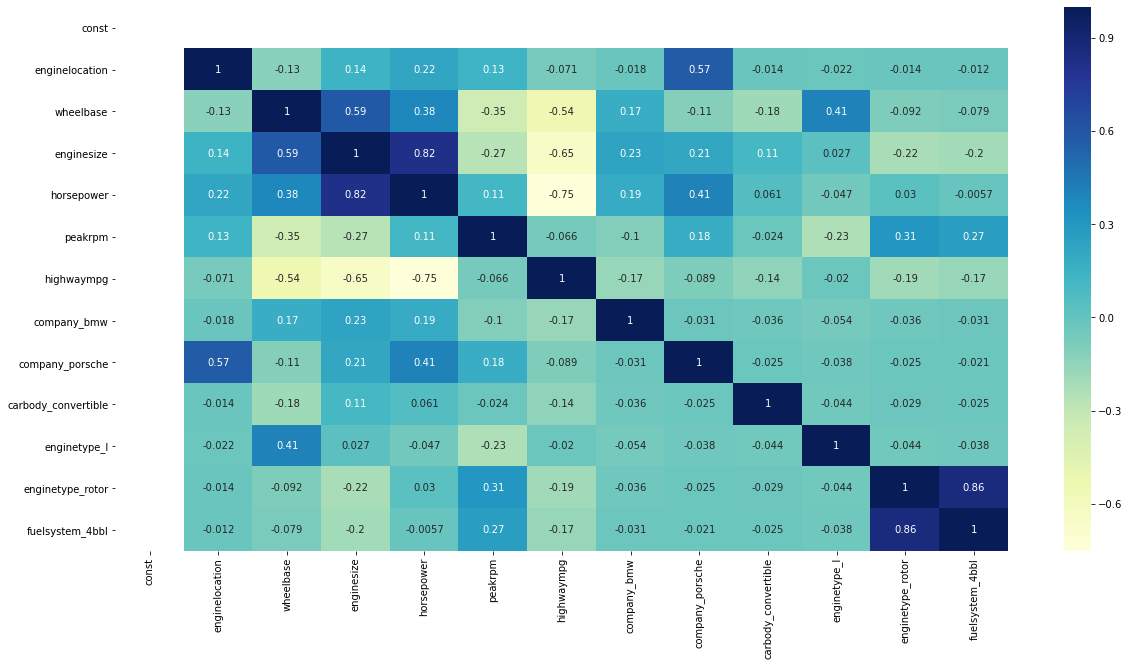

In [134]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train_temp.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [135]:
# dropping highwaympg and refitting the model [4]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot', 'carwidth', 'highwaympg'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     108.5
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.34e-60
Time:                        04:58:31   Log-Likelihood:                 182.36
No. Observations:                 143   AIC:                            -340.7
Df Residuals:                     131   BIC:                            -305.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1777    

In [136]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.68
3,enginesize,7.54
4,horsepower,6.13
10,enginetype_rotor,4.36
11,fuelsystem_4bbl,3.97
2,wheelbase,2.68
7,company_porsche,1.91
5,peakrpm,1.77
1,enginelocation,1.56
9,enginetype_l,1.41


*enginesize seems to be highly correlated to horsepower, dropping enginesize*

In [137]:
# dropping enginesize and refitting the model [5]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot', 'carwidth', 'highwaympg', 'enginesize'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     89.83
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           6.76e-54
Time:                        05:00:31   Log-Likelihood:                 163.87
No. Observations:                 143   AIC:                            -305.7
Df Residuals:                     132   BIC:                            -273.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1279    

In [138]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.84
9,enginetype_rotor,4.07
10,fuelsystem_4bbl,3.95
2,wheelbase,2.13
3,horsepower,1.92
6,company_porsche,1.86
1,enginelocation,1.50
4,peakrpm,1.39
8,enginetype_l,1.33
7,carbody_convertible,1.11


In [139]:
# dropping enginetype_rotor and refitting the model [6]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot', 'carwidth', 'highwaympg', 'enginesize', 'enginetype_rotor'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     99.64
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.11e-54
Time:                        05:03:04   Log-Likelihood:                 163.29
No. Observations:                 143   AIC:                            -306.6
Df Residuals:                     133   BIC:                            -277.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1294    

In [142]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.60
2,wheelbase,2.12
3,horsepower,1.90
6,company_porsche,1.85
1,enginelocation,1.50
8,enginetype_l,1.33
4,peakrpm,1.28
7,carbody_convertible,1.11
5,company_bmw,1.08


In [141]:
# dropping fuelsystem_4bbl and refitting the model [7]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot', 'carwidth', 'highwaympg', 'enginesize', 'enginetype_rotor', 'fuelsystem_4bbl'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.57e-55
Time:                        05:06:10   Log-Likelihood:                 161.94
No. Observations:                 143   AIC:                            -305.9
Df Residuals:                     134   BIC:                            -279.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1341    

In [143]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.60
2,wheelbase,2.12
3,horsepower,1.90
6,company_porsche,1.85
1,enginelocation,1.50
8,enginetype_l,1.33
4,peakrpm,1.28
7,carbody_convertible,1.11
5,company_bmw,1.08


In [144]:
# dropping enginetype_l and refitting the model [8]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot', 'carwidth', 'highwaympg', 'enginesize', 'enginetype_rotor', 'fuelsystem_4bbl', 'enginetype_l'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     116.5
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           5.00e-54
Time:                        05:08:14   Log-Likelihood:                 156.50
No. Observations:                 143   AIC:                            -297.0
Df Residuals:                     135   BIC:                            -273.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1246    

In [145]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.41
6,company_porsche,1.82
3,horsepower,1.78
2,wheelbase,1.70
1,enginelocation,1.50
4,peakrpm,1.27
7,carbody_convertible,1.10
5,company_bmw,1.07


In [146]:
# dropping peakrpm and refitting the model [9]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot', 'carwidth', 'highwaympg', 'enginesize', 'enginetype_rotor', 'fuelsystem_4bbl', 'enginetype_l', 'peakrpm'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     135.2
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           8.69e-55
Time:                        05:10:13   Log-Likelihood:                 155.70
No. Observations:                 143   AIC:                            -297.4
Df Residuals:                     136   BIC:                            -276.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1498    

In [147]:
# dropping company_porsche and refitting the model [10]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot', 'carwidth', 'highwaympg', 'enginesize', 'enginetype_rotor', 'fuelsystem_4bbl', 'enginetype_l', 'peakrpm', 'company_porsche'], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     159.6
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           2.51e-55
Time:                        05:11:32   Log-Likelihood:                 154.28
No. Observations:                 143   AIC:                            -296.6
Df Residuals:                     137   BIC:                            -278.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1499    

In [148]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.76
3,horsepower,1.34
2,wheelbase,1.33
1,enginelocation,1.12
5,carbody_convertible,1.07
4,company_bmw,1.05


In [155]:
# dropping const and refitting the model [10]
X_train_temp = X_train_rfe.drop(['curbweight', 'company_peugeot', 'carwidth', 'highwaympg', 'enginesize', 'enginetype_rotor', 'fuelsystem_4bbl', 'enginetype_l', 'peakrpm', 'company_porsche'], axis = 1)
lm = sm.OLS(y_train,X_train_temp).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              216.3
Date:                Tue, 31 Mar 2020   Prob (F-statistic):                    1.87e-63
Time:                        05:15:38   Log-Likelihood:                          121.73
No. Observations:                 143   AIC:                                     -233.5
Df Residuals:                     138   BIC:                                     -218.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [156]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,horsepower,3.71
1,wheelbase,3.43
0,enginelocation,1.12
3,company_bmw,1.09
4,carbody_convertible,1.05


# Residual analysis

In [157]:
y_train_price = lm.predict(X_train_temp)

Text(0.5, 0, 'Errors')

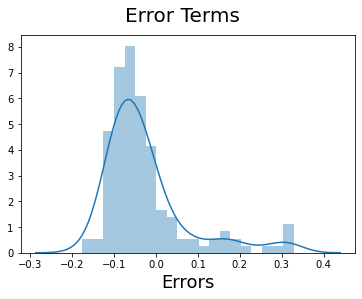

In [158]:
# Plot the histogram of the error terms
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# model evaluation

In [162]:
# scale test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

d:\programfiles_x64\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\programfiles_x64\python37\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
d:\programfiles_x64\python37\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [163]:
df_test[num_vars].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855


In [164]:
# create test X and y sets
y_test = df_test.pop('price')
X_test = df_test

In [165]:
# calculate predicted y values
X_test_temp = X_test[X_train_temp.columns]
y_pred = lm.predict(X_test_temp)

Text(0, 0.5, 'y_pred')

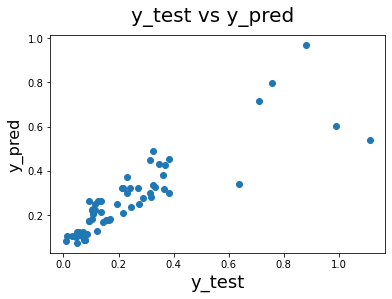

In [166]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# The most significant variable in predicting the price of the car is horsepower
# Other predictor variables are fueltype and enginelocation
# Company is also a predictor variable, which in business terms will be branding